In [1]:
import pandas as pd
print(pd.__version__)

2.0.3


In [66]:
# on SIMON local, use conda env pytroch_2023

DIR = !pwd # bc we can't do Path(__file__) in a ipynb

import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format) # for better readabilty of the tables

from pathlib import Path
import sys
import pickle
import wandb
from datetime import datetime 
from matplotlib import pyplot as plt

PATH = Path(str(DIR)[2:-2]) # bc the !pwd returns a list

sys.path.insert(0, str(Path(*[i for i in PATH.parts[:PATH.parts.index("views_pipeline")+1]]) / "common_utils")) # PATH_COMMON_UTILS  
from set_path import setup_project_paths, setup_data_paths
setup_project_paths(PATH)

from utils_logging_and_print_outputs import print_dataset_dates

from config_hyperparameters import get_hp_config
from utils import get_data

In [3]:
pd.__version__

'2.0.3'

# CALIBRATION:

In [4]:
# this jazz is just to emulate the behavior of the scripts which all uses the waandb.init() to get the config

config_dict = get_hp_config()
config_dict['run_type'] = 'calibration'

wandb.init(config=config_dict)
config = wandb.config

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: simpol (nornir). Use `wandb login --relogin` to force relogin


In [7]:
# Loading a the pkl df to check columsn
with open('/home/simon/Documents/scripts/views_pipeline/models/purple_alien/data/raw/calibration_viewser_df.pkl', 'rb') as file: 
    views_df_c = pickle.load(file)

# Loading a the pkl df to check columsn
with open('/home/simon/Documents/scripts/views_pipeline/models/purple_alien/data/raw/testing_viewser_df.pkl', 'rb') as file: 
    views_df_t = pickle.load(file)

# Loading a the pkl df to check columsn
with open('/home/simon/Documents/scripts/views_pipeline/models/purple_alien/data/raw/forecasting_viewser_df.pkl', 'rb') as file: 
    views_df_f = pickle.load(file)

In [68]:
# Example usage with a list of DataFrames
dfs = [views_df_c, views_df_t, views_df_f]

for df in dfs:
    print_dataset_dates(df)



----------------------------------------

Minimum month_id: 121
Maximum month_id: 444
Minimum year: 1990
Maximum year: 2016
First date (first month of the first year): January 1990
Last date (last month of the last year): December 2016

----------------------------------------


----------------------------------------

Minimum month_id: 121
Maximum month_id: 492
Minimum year: 1990
Maximum year: 2020
First date (first month of the first year): January 1990
Last date (last month of the last year): December 2020

----------------------------------------


----------------------------------------

Minimum month_id: 121
Maximum month_id: 534
Minimum year: 1990
Maximum year: 2024
First date (first month of the first year): January 1990
Last date (last month of the last year): June 2024

----------------------------------------



In [54]:
# Helper function to get the formatted date for the first or last entry
def get_formatted_date(df, year, month):
    return datetime(year, month, 1).strftime("%B %Y")

# Helper function to print min/max month and year
def print_min_max_info(df):
    print(f"min month_id: {df['month_id'].min()}")
    print(f"max month_id: {df['month_id'].max()}")
    print(f"min year_id: {df['year_id'].min()}")
    print(f"max year_id: {df['year_id'].max()}")

# Helper function to get the first or last month and year
def get_first_or_last_date(df, first=True):
    if first:
        year = df['year_id'].min()
        month = df[df['year_id'] == year]['month'].min()
    else:
        year = df['year_id'].max()
        month = df[df['year_id'] == year]['month'].max()
    
    return get_formatted_date(df, year, month)

# Main loop to process each DataFrame
dfs = [views_df_c, views_df_t, views_df_f]

for df in dfs:

    print(f"columns: {df.columns}\n")
    print(f"shape{i.shape}\n")
    print(f"head: {i.head(3)}\n")

    print_min_max_info(df)

    first_date = get_first_or_last_date(df, first=True)
    print(f"First date (first month of first year): {first_date}")

    last_date = get_first_or_last_date(df, first=False)
    print(f"Last date (last month of last year): {last_date}")

    print("\n\n")

columns: Index(['month_id', 'pg_id', 'month', 'year_id', 'c_id', 'col', 'row',
       'ln_sb_best', 'ln_ns_best', 'ln_os_best', 'in_viewser'],
      dtype='object')

shape(5427540, 11)

head:          month_id  pg_id  month  year_id  c_id  col  row  ln_sb_best  \
1573200       121  62356      1     1990   192  436   87        0.00   
1573201       121  79599      1     1990   192  399  111        0.00   
1573202       121  79600      1     1990   192  400  111        0.00   

         ln_ns_best  ln_os_best  in_viewser  
1573200        0.00        0.00        True  
1573201        0.00        0.00        True  
1573202        0.00        0.00        True  

min month_id: 121
max month_id: 444
min year_id: 1990
max year_id: 2016
First date (first month of first year): January 1990
Last date (last month of last year): December 2016



columns: Index(['month_id', 'pg_id', 'month', 'year_id', 'c_id', 'col', 'row',
       'ln_sb_best', 'ln_ns_best', 'ln_os_best', 'in_viewser'],
      dtype=

In [48]:
dfs = [views_df_c, views_df_t, views_df_f]

for i in dfs:

    print(f"min month_id: {i['month_id'].min()}")
    print(f"max month: {i['month_id'].max()}")
    print(f"min year: {i['year_id'].min()}")
    print(f"max year: {i['year_id'].max()}")

    # and now print the first month of the first year
    first_month = i[(i['year_id'] == i['year_id'].min()) & (i['month_id'] == i['month_id'].min())]['month'].unique()[0]
    first_year = i[(i['year_id'] == i['year_id'].min()) & (i['month_id'] == i['month_id'].min())]['year_id'].unique()[0]

    first_data = datetime(first_year, first_month, 1).strftime("%B %Y")
    print(f"First date (first month of first year): {first_data}")

    last_month = i[(i['year_id'] == i['year_id'].max()) & (i['month_id'] == i['month_id'].max())]['month'].unique()[0]
    last_year = i[(i['year_id'] == i['year_id'].max()) & (i['month_id'] == i['month_id'].max())]['year_id'].unique()[0]

    last_data = datetime(last_year, last_month, 1).strftime("%B %Y")
    print(f"Last date (last month of last year): {last_data}")
          
    print("\n\n")

min month_id: 121
max month: 444
min year: 1990
max year: 2016
First date (first month of first year): January 1990
Last date (last month of last year): December 2016



min month_id: 121
max month: 492
min year: 1990
max year: 2020
First date (first month of first year): January 1990
Last date (last month of last year): December 2020



min month_id: 121
max month: 534
min year: 1990
max year: 2024
First date (first month of first year): January 1990
Last date (last month of last year): June 2024





In [5]:
# new output viewser 6 - seems to fit

# Loading a the pkl df to check columsn
with open('/home/simon/Documents/scripts/views_pipeline/models/purple_alien/data/raw/calibration_viewser_df.pkl', 'rb') as file: 
    views_df = pickle.load(file)

print(views_df.columns)
views_df.describe()

Index(['month_id', 'pg_id', 'month', 'year_id', 'c_id', 'col', 'row',
       'ln_sb_best', 'ln_ns_best', 'ln_os_best', 'in_viewser'],
      dtype='object')


,month_id,pg_id,month,year_id,c_id,col,row,ln_sb_best,ln_ns_best,ln_os_best
count,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00
mean,282.50,144794.09,6.50,2003.00,140.46,407.68,201.54,0.00,0.00,0.00
std,93.53,26708.16,3.45,7.79,65.59,36.67,37.10,0.08,0.04,0.05
min,121.00,62356.00,1.00,1990.00,40.00,310.00,87.00,0.00,0.00,0.00
25%,201.75,126436.00,3.75,1996.00,70.00,383.00,176.00,0.00,0.00,0.00
50%,282.50,149457.50,6.50,2003.00,154.00,410.00,208.00,0.00,0.00,0.00
75%,363.25,166012.00,9.25,2010.00,191.00,435.00,231.00,0.00,0.00,0.00
max,444.00,190511.00,12.00,2016.00,254.00,487.00,265.00,5.99,4.56,6.34


In [3]:
# OLD OUTPUT viewser 5

# Loading a the pkl df to check columsn
with open('/home/simon/Documents/scripts/views_pipeline/models/purple_alien/data/raw/calibration_viewser_data.pkl', 'rb') as file: # not machine agnostic
    views_df = pickle.load(file)

print(views_df.columns)
views_df.describe()

Index(['month_id', 'pg_id', 'month', 'year_id', 'c_id', 'col', 'row',
       'ln_sb_best', 'ln_ns_best', 'ln_os_best', 'in_viewser', 'abs_row',
       'abs_col', 'abs_month'],
      dtype='object')


,month_id,pg_id,month,year_id,c_id,col,row,ln_sb_best,ln_ns_best,ln_os_best,abs_row,abs_col,abs_month
count,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00,4247640.00
mean,282.50,144794.09,6.50,2003.00,140.46,407.68,201.54,0.00,0.00,0.00,114.54,97.68,161.50
std,93.53,26708.16,3.45,7.79,65.59,36.67,37.10,0.08,0.04,0.05,37.10,36.67,93.53
min,121.00,62356.00,1.00,1990.00,40.00,310.00,87.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,201.75,126436.00,3.75,1996.00,70.00,383.00,176.00,0.00,0.00,0.00,89.00,73.00,80.75
50%,282.50,149457.50,6.50,2003.00,154.00,410.00,208.00,0.00,0.00,0.00,121.00,100.00,161.50
75%,363.25,166012.00,9.25,2010.00,191.00,435.00,231.00,0.00,0.00,0.00,144.00,125.00,242.25
max,444.00,190511.00,12.00,2016.00,254.00,487.00,265.00,5.99,4.56,6.16,178.00,177.00,323.00


In [4]:
views_df.head() # looks legit...

,month_id,pg_id,month,year_id,c_id,col,row,ln_sb_best,ln_ns_best,ln_os_best,in_viewser,abs_row,abs_col,abs_month
1573200,121,62356,1,1990,192,436,87,0.00,0.00,0.00,True,0,126,0
1573201,121,79599,1,1990,192,399,111,0.00,0.00,0.00,True,24,89,0
1573202,121,79600,1,1990,192,400,111,0.00,0.00,0.00,True,24,90,0
1573203,121,79601,1,1990,192,401,111,0.00,0.00,0.00,True,24,91,0
1573204,121,80317,1,1990,192,397,112,0.00,0.00,0.00,True,25,87,0


In [5]:
print(views_df['month_id'].unique())
print(views_df['month_id'].unique().shape) # 12 months, 1 year 

[121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300
 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354
 355 356 357 358 359 360 361 362 363 364 365 366 36

In [9]:
views_vol = get_data(config)
print(views_vol.shape)

print(np.unique(views_vol[:,:,:,3])) # look legit - check partation config)

Loading calibration data from /calibration_vol.npy...
(324, 180, 180, 8)
[  0. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189.
 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203.
 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217.
 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230. 231.
 232. 233. 234. 235. 236. 237. 238. 239. 240. 241. 242. 243. 244. 245.
 246. 247. 248. 249. 250. 251. 252. 253. 254. 255. 256. 257. 258. 259.
 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270. 271. 272. 273.
 274. 275. 276. 277. 278. 279. 280. 281. 282. 283. 284. 285. 286. 287.
 288. 289. 290. 291. 292. 293. 294. 295. 296. 297. 298. 299. 300. 301.
 302

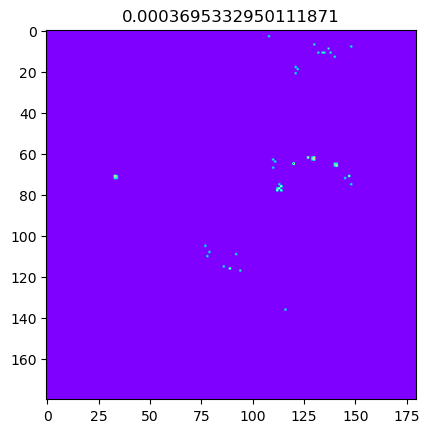

In [10]:
plt.imshow(views_vol[0,:,:,5], cmap = 'rainbow')
plt.title(views_vol[0,:,:,6].mean())
plt.show()

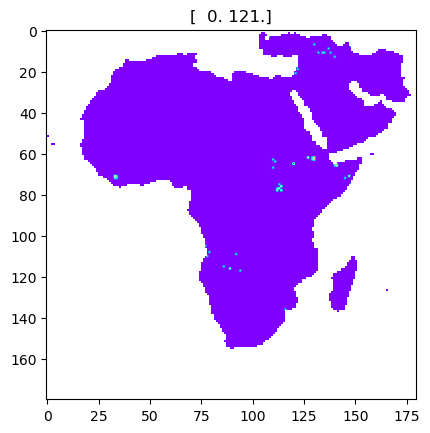

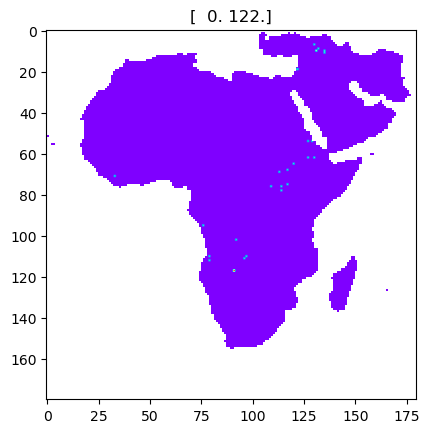

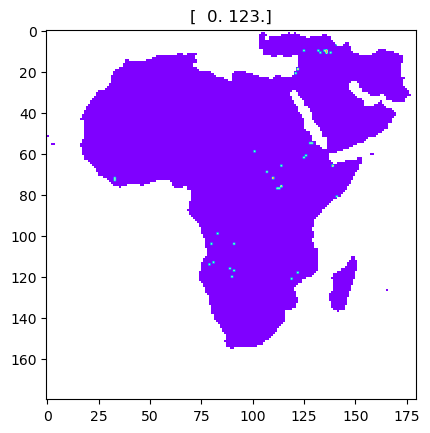

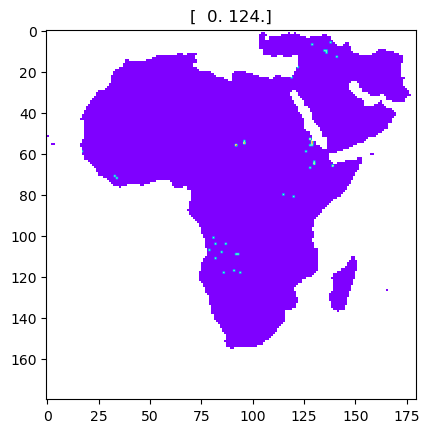

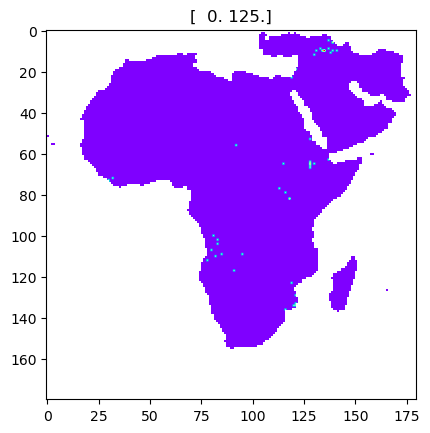

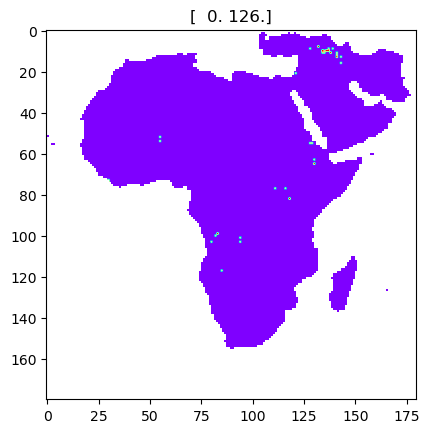

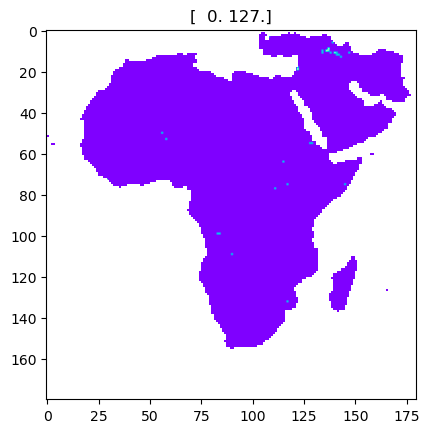

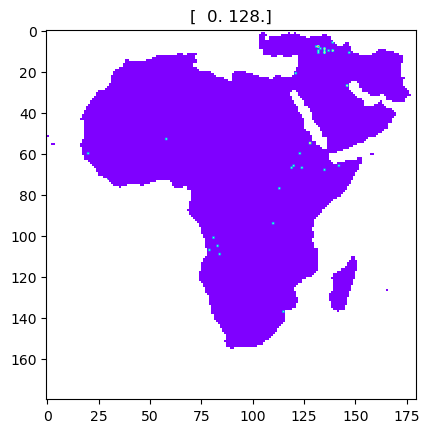

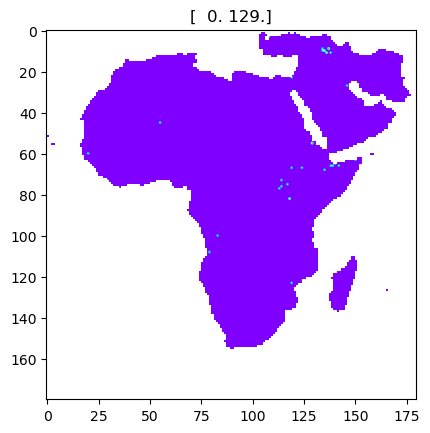

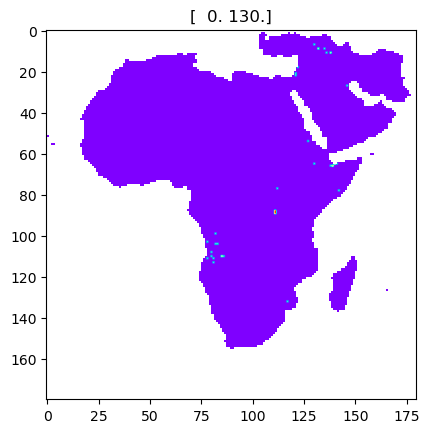

In [25]:
for i in range(10): #(vol.shape[0]):
    true_obs_masked = np.ma.masked_where((views_vol[0,:,:,4] == 0), views_vol[i,:,:,5])
    plt.imshow(true_obs_masked, cmap = 'rainbow')
    plt.title(str(np.unique(views_vol[i,:,:,3]))) # mean wrong since lots of zeros (oceans etc.) Parhaps the zeros should just get a month_id anyway?
    plt.show()

/home/simon/anaconda3/envs/pytorch_2023/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


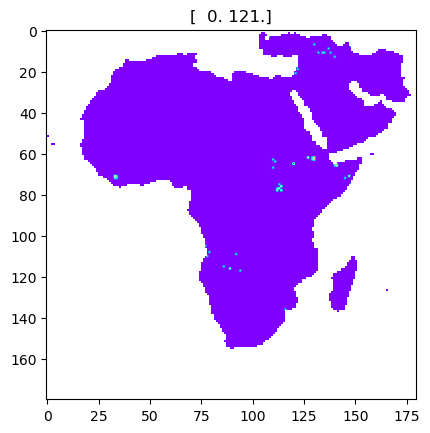

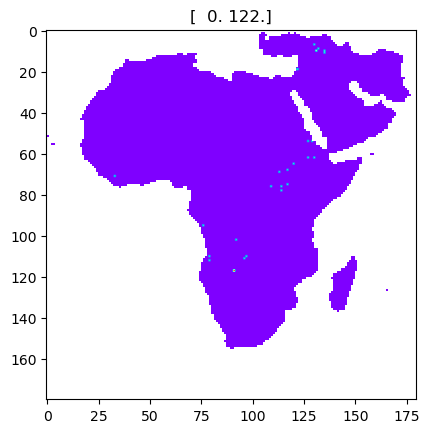

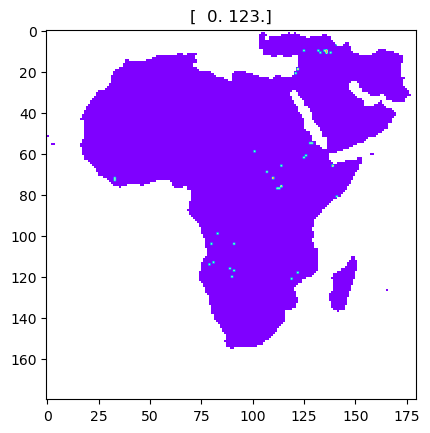

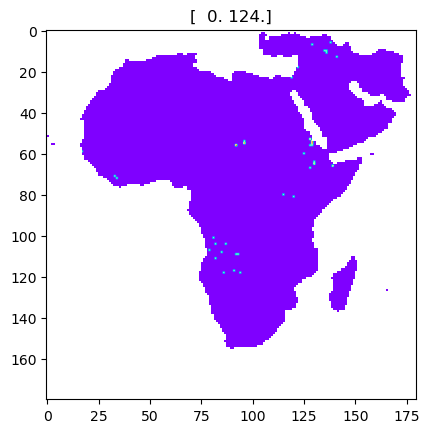

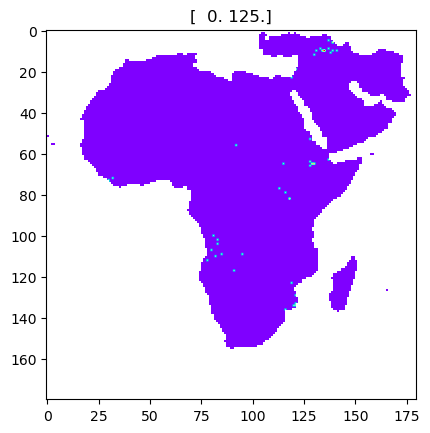

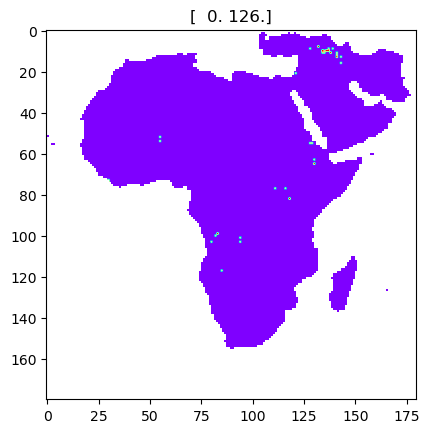

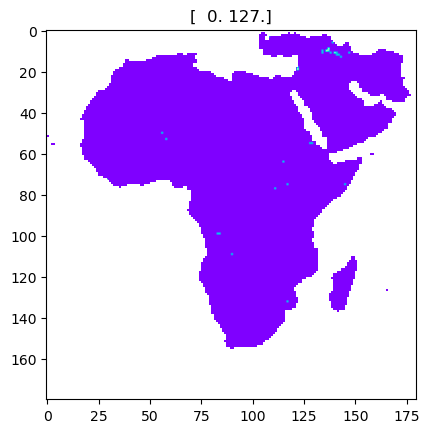

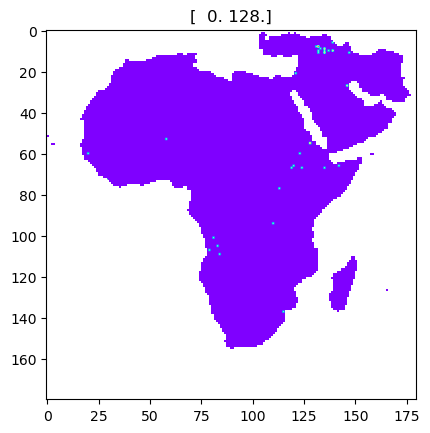

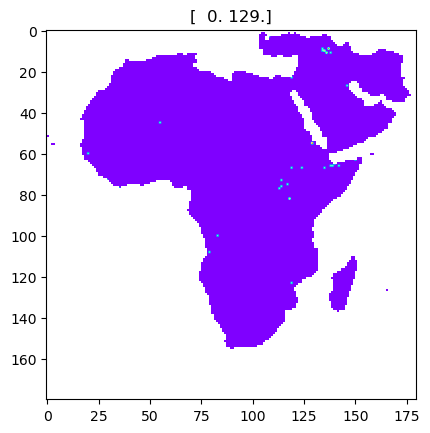

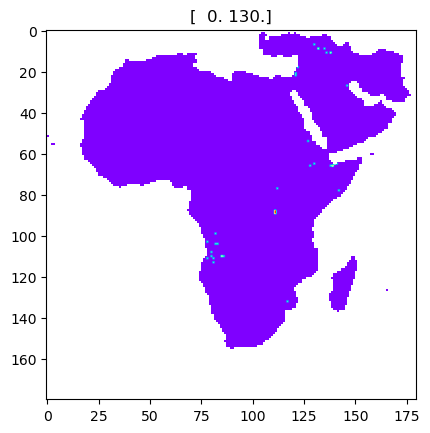

In [8]:
for i in range(10): #(vol.shape[0]):
    true_obs_masked = np.ma.masked_where((views_vol[0,:,:,4] == 0), views_vol[i,:,:,5])
    plt.imshow(true_obs_masked, cmap = 'rainbow')
    plt.title(np.unique(views_vol[i,:,:,3])) # mean wrong since lots of zeros (oceans etc.) Parhaps the zeros should just get a month_id anyway?
    plt.show()

In [9]:
# make a timeleapse of the above to see if it makes sense


# TEST

In [10]:
# this jazz is just to emulate the behavior of the scripts which all uses the waandb.init() to get the config

config_dict = get_hp_config()
config_dict['model_type'] = 'testing'

wandb.init(config=config_dict)
config = wandb.config

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


In [11]:
# Loading a the pkl df to check columsn
with open('/home/simon/Documents/scripts/views_pipeline/models/purple_alien/data/raw/testing_viewser_data.pkl', 'rb') as file: # not machine agnostic
    views_df = pickle.load(file)

print(views_df.columns)
views_df.describe()

Index(['month_id', 'pg_id', 'month', 'year_id', 'c_id', 'col', 'row',
       'ln_sb_best', 'ln_ns_best', 'ln_os_best', 'in_viewser', 'abs_row',
       'abs_col', 'abs_month'],
      dtype='object')


,month_id,pg_id,month,year_id,c_id,col,row,ln_sb_best,ln_ns_best,ln_os_best,abs_row,abs_col,abs_month
count,4876920.00,4876920.00,4876920.00,4876920.00,4876920.00,4876920.00,4876920.00,4876920.00,4876920.00,4876920.00,4876920.00,4876920.00,4876920.00
mean,306.50,144794.09,6.50,2005.00,141.25,407.68,201.54,0.00,0.00,0.00,114.54,97.68,185.50
std,107.39,26708.16,3.45,8.94,65.58,36.67,37.10,0.09,0.04,0.05,37.10,36.67,107.39
min,121.00,62356.00,1.00,1990.00,40.00,310.00,87.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,213.75,126436.00,3.75,1997.00,70.00,383.00,176.00,0.00,0.00,0.00,89.00,73.00,92.75
50%,306.50,149457.50,6.50,2005.00,157.00,410.00,208.00,0.00,0.00,0.00,121.00,100.00,185.50
75%,399.25,166012.00,9.25,2013.00,213.00,435.00,231.00,0.00,0.00,0.00,144.00,125.00,278.25
max,492.00,190511.00,12.00,2020.00,254.00,487.00,265.00,5.99,4.88,6.16,178.00,177.00,371.00


In [12]:
views_df.head() # looks legit...

,month_id,pg_id,month,year_id,c_id,col,row,ln_sb_best,ln_ns_best,ln_os_best,in_viewser,abs_row,abs_col,abs_month
1573200,121,62356,1,1990,192,436,87,0.00,0.00,0.00,True,0,126,0
1573201,121,79599,1,1990,192,399,111,0.00,0.00,0.00,True,24,89,0
1573202,121,79600,1,1990,192,400,111,0.00,0.00,0.00,True,24,90,0
1573203,121,79601,1,1990,192,401,111,0.00,0.00,0.00,True,24,91,0
1573204,121,80317,1,1990,192,397,112,0.00,0.00,0.00,True,25,87,0


In [13]:
print(views_df['month_id'].unique())

print(views_df['month_id'].unique().shape) # 12 months, 1 year 

[121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300
 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354
 355 356 357 358 359 360 361 362 363 364 365 366 36

In [14]:
views_vol = get_data(config)
print(views_vol.shape)

print(np.unique(views_vol[:,:,:,3])) # look legit - check partation config)

(372, 180, 180, 8)
[  0. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189.
 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203.
 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217.
 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230. 231.
 232. 233. 234. 235. 236. 237. 238. 239. 240. 241. 242. 243. 244. 245.
 246. 247. 248. 249. 250. 251. 252. 253. 254. 255. 256. 257. 258. 259.
 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270. 271. 272. 273.
 274. 275. 276. 277. 278. 279. 280. 281. 282. 283. 284. 285. 286. 287.
 288. 289. 290. 291. 292. 293. 294. 295. 296. 297. 298. 299. 300. 301.
 302. 303. 304. 305. 306. 307. 308. 309. 310. 311. 312. 31

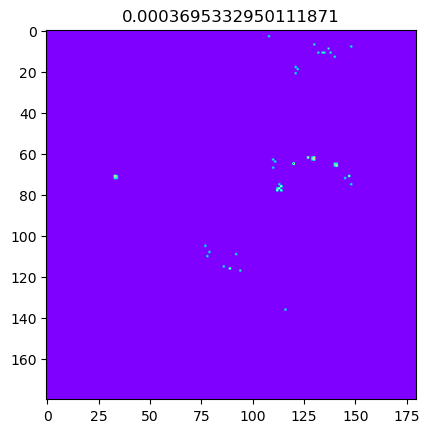

In [15]:
plt.imshow(views_vol[0,:,:,5], cmap = 'rainbow')
plt.title(views_vol[0,:,:,6].mean())
plt.show()

/home/simon/anaconda3/envs/pytorch_2023/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


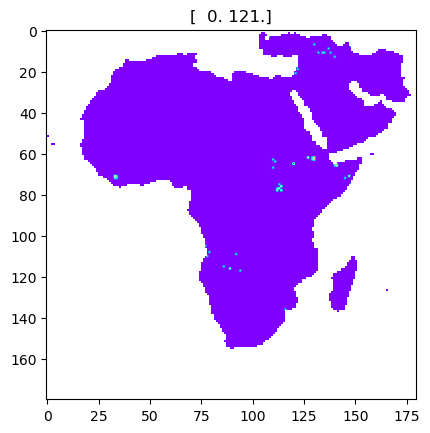

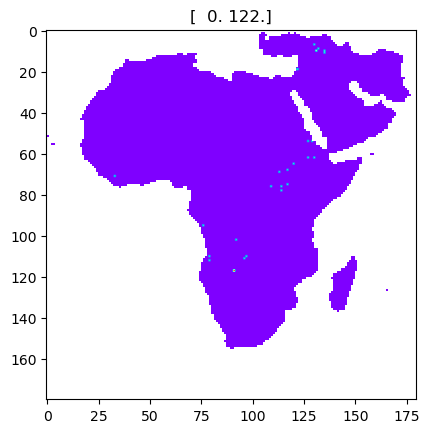

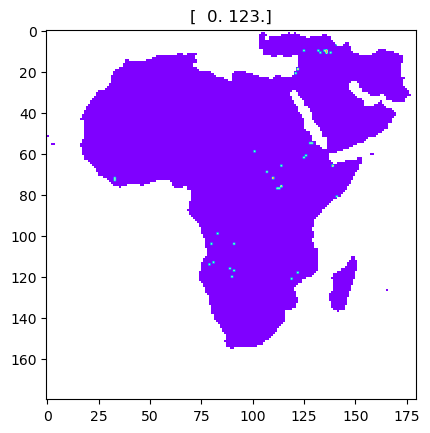

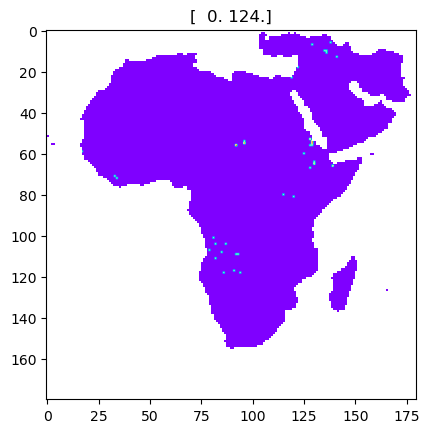

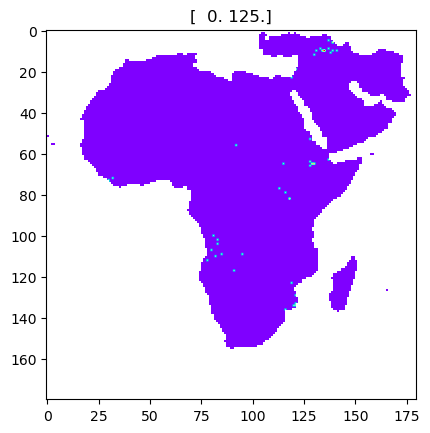

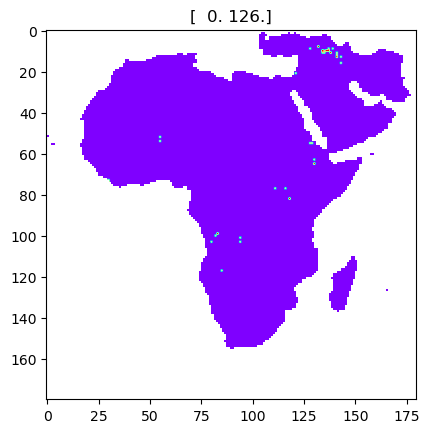

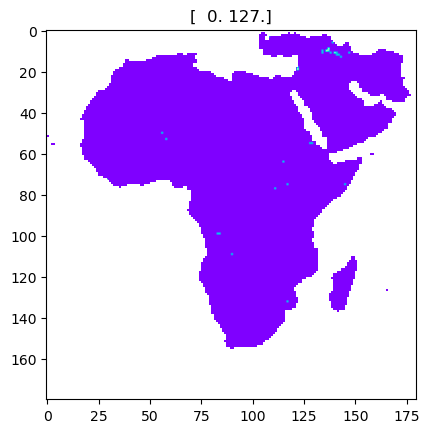

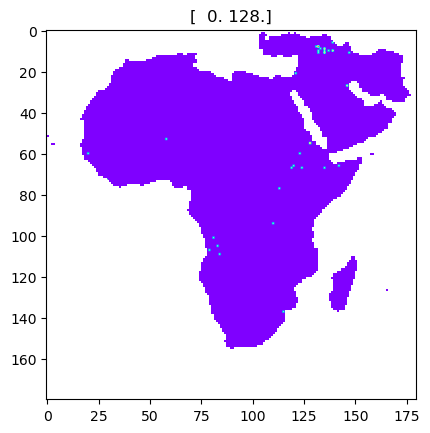

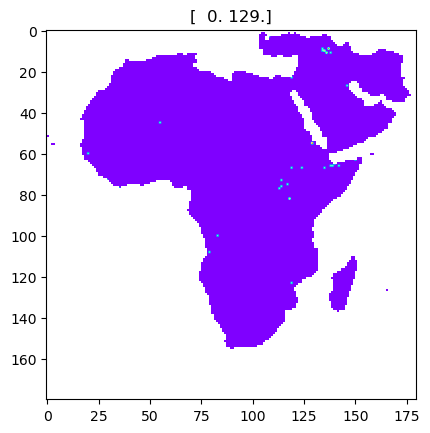

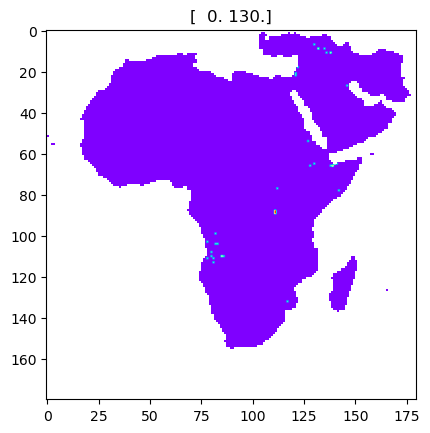

In [16]:
for i in range(10): #(vol.shape[0]):
    true_obs_masked = np.ma.masked_where((views_vol[0,:,:,4] == 0), views_vol[i,:,:,5])
    plt.imshow(true_obs_masked, cmap = 'rainbow')
    plt.title(np.unique(views_vol[i,:,:,3])) # mean wrong since lots of zeros (oceans etc.) Parhaps the zeros should just get a month_id anyway?
    plt.show()

# FORECASTING 

In [17]:
# this jazz is just to emulate the behavior of the scripts which all uses the waandb.init() to get the config

config_dict = get_hp_config()
config_dict['model_type'] = 'forecasting'

wandb.init(config=config_dict)
config = wandb.config

wandb: WARNING Source type is set to 'repo' but some required information is missing from the environment. A job will not be created from this run. See https://docs.wandb.ai/guides/launch/create-job


In [18]:
# Loading a the pkl df to check columsn
with open('/home/simon/Documents/scripts/views_pipeline/models/purple_alien/data/raw/forecasting_viewser_data.pkl', 'rb') as file: # not machine agnostic
    views_df = pickle.load(file)

print(views_df.columns)
views_df.describe()


Index(['month_id', 'pg_id', 'month', 'year_id', 'c_id', 'col', 'row',
       'ln_sb_best', 'ln_ns_best', 'ln_os_best', 'in_viewser', 'abs_row',
       'abs_col', 'abs_month'],
      dtype='object')


,month_id,pg_id,month,year_id,c_id,col,row,ln_sb_best,ln_ns_best,ln_os_best,abs_row,abs_col,abs_month
count,5361990.00,5361990.00,5361990.00,5361990.00,5361990.00,5361990.00,5361990.00,5361990.00,5361990.00,5361990.00,5361990.00,5361990.00,5361990.00
mean,325.00,144794.09,6.49,2006.54,141.73,407.68,201.54,0.01,0.00,0.00,114.54,97.68,204.00
std,118.07,26708.16,3.46,9.84,65.57,36.67,37.10,0.09,0.04,0.05,37.10,36.67,118.07
min,121.00,62356.00,1.00,1990.00,40.00,310.00,87.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,223.00,126436.00,3.00,1998.00,70.00,383.00,176.00,0.00,0.00,0.00,89.00,73.00,102.00
50%,325.00,149457.50,6.00,2007.00,157.00,410.00,208.00,0.00,0.00,0.00,121.00,100.00,204.00
75%,427.00,166012.00,9.00,2015.00,213.00,435.00,231.00,0.00,0.00,0.00,144.00,125.00,306.00
max,529.00,190511.00,12.00,2024.00,254.00,487.00,265.00,5.99,4.88,6.16,178.00,177.00,408.00


In [19]:
views_df.head() # looks more legit now...

,month_id,pg_id,month,year_id,c_id,col,row,ln_sb_best,ln_ns_best,ln_os_best,in_viewser,abs_row,abs_col,abs_month
1573200,121,62356,1,1990,192,436,87,0.00,0.00,0.00,True,0,126,0
1573201,121,79599,1,1990,192,399,111,0.00,0.00,0.00,True,24,89,0
1573202,121,79600,1,1990,192,400,111,0.00,0.00,0.00,True,24,90,0
1573203,121,79601,1,1990,192,401,111,0.00,0.00,0.00,True,24,91,0
1573204,121,80317,1,1990,192,397,112,0.00,0.00,0.00,True,25,87,0


In [20]:
print(views_df['month_id'].unique())

print(views_df['month_id'].unique().shape) # 12 months, 1 year 

[121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210
 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264
 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282
 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300
 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318
 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336
 337 338 339 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354
 355 356 357 358 359 360 361 362 363 364 365 366 36

In [21]:
views_vol = get_data(config)
print(views_vol.shape)

print(np.unique(views_vol[:,:,:,3])) # look legit - check partation config)

(409, 180, 180, 8)
[  0. 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133.
 134. 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147.
 148. 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161.
 162. 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175.
 176. 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189.
 190. 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203.
 204. 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217.
 218. 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 230. 231.
 232. 233. 234. 235. 236. 237. 238. 239. 240. 241. 242. 243. 244. 245.
 246. 247. 248. 249. 250. 251. 252. 253. 254. 255. 256. 257. 258. 259.
 260. 261. 262. 263. 264. 265. 266. 267. 268. 269. 270. 271. 272. 273.
 274. 275. 276. 277. 278. 279. 280. 281. 282. 283. 284. 285. 286. 287.
 288. 289. 290. 291. 292. 293. 294. 295. 296. 297. 298. 299. 300. 301.
 302. 303. 304. 305. 306. 307. 308. 309. 310. 311. 312. 31

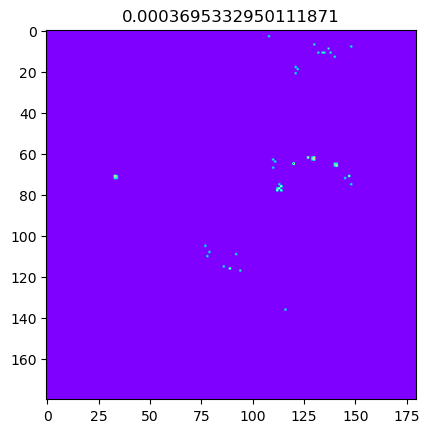

In [22]:
plt.imshow(views_vol[0,:,:,5], cmap = 'rainbow')
plt.title(views_vol[0,:,:,6].mean())
plt.show()

/home/simon/anaconda3/envs/pytorch_2023/lib/python3.8/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


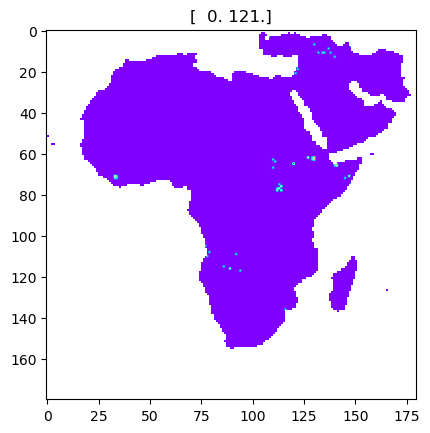

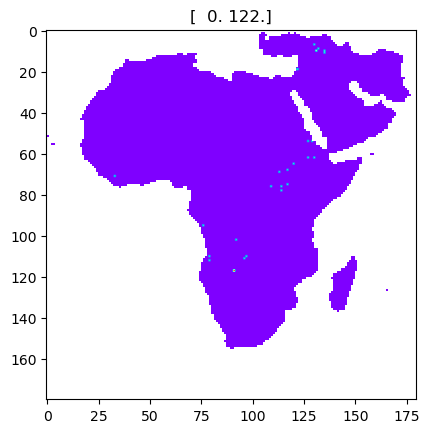

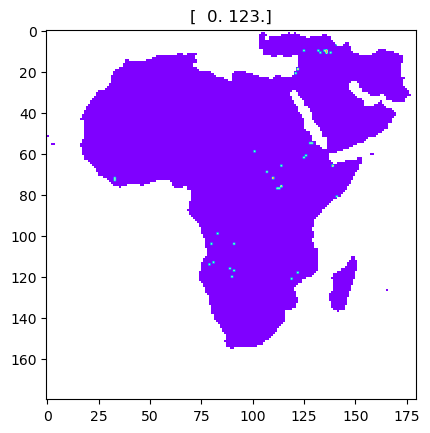

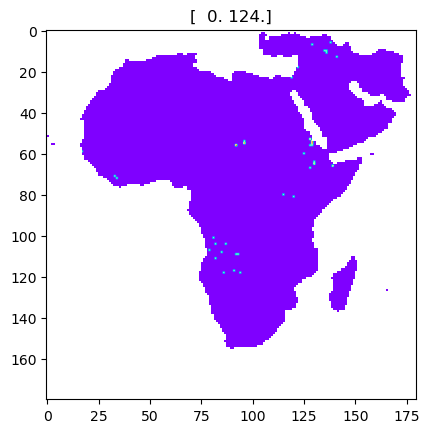

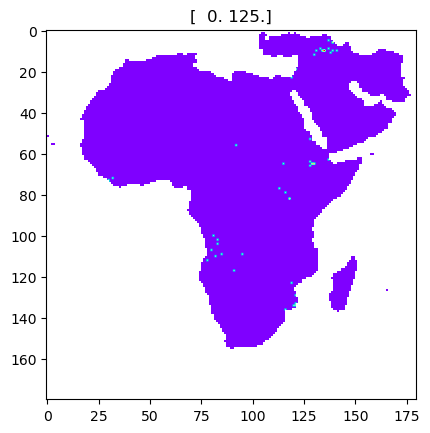

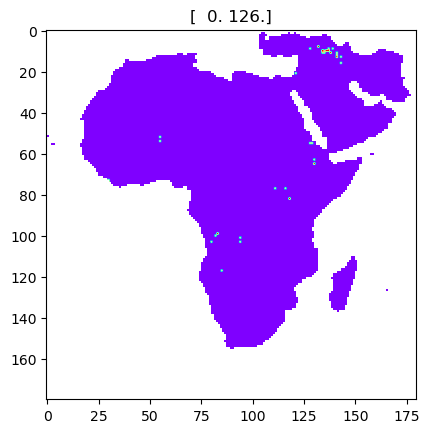

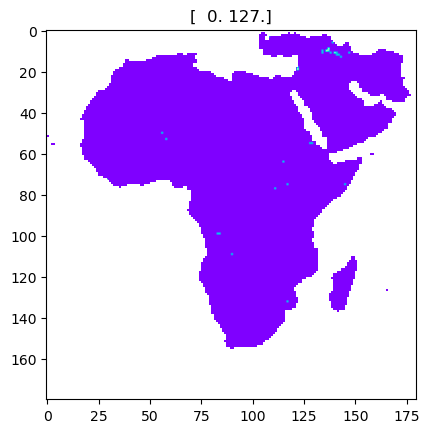

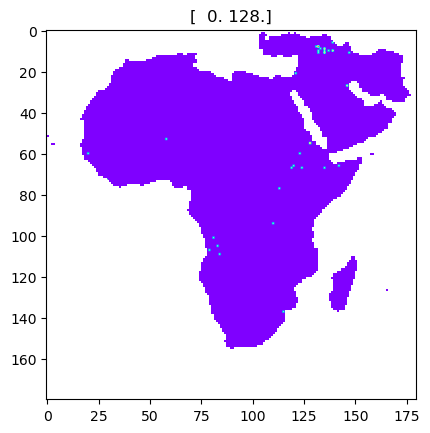

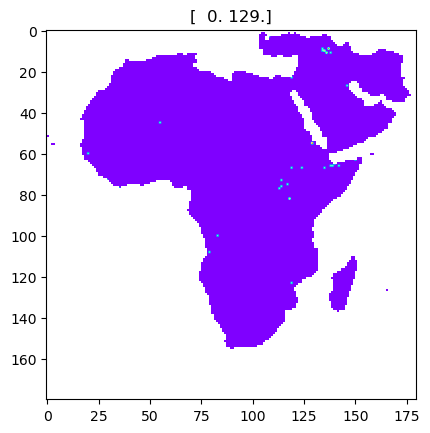

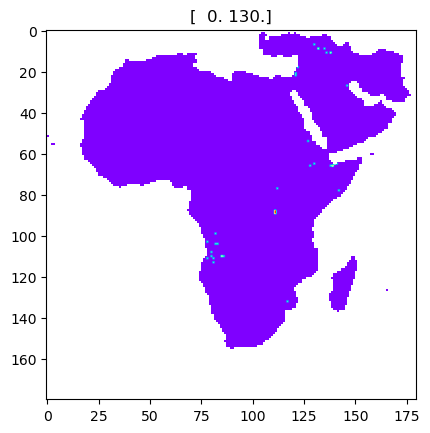

In [23]:
for i in range(10): #(vol.shape[0]):
    true_obs_masked = np.ma.masked_where((views_vol[0,:,:,4] == 0), views_vol[i,:,:,5])
    plt.imshow(true_obs_masked, cmap = 'rainbow')
    plt.title(np.unique(views_vol[i,:,:,3])) # mean wrong since lots of zeros (oceans etc.) Parhaps the zeros should just get a month_id anyway?
    plt.show()

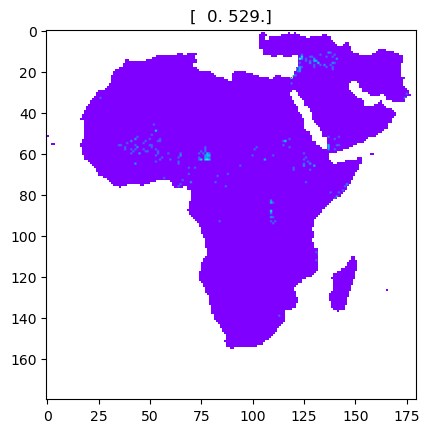

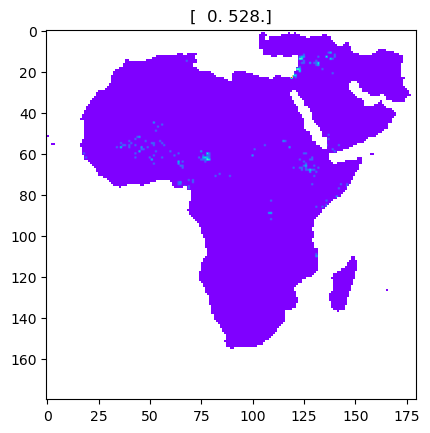

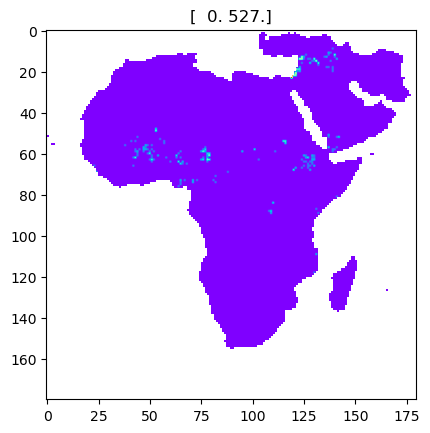

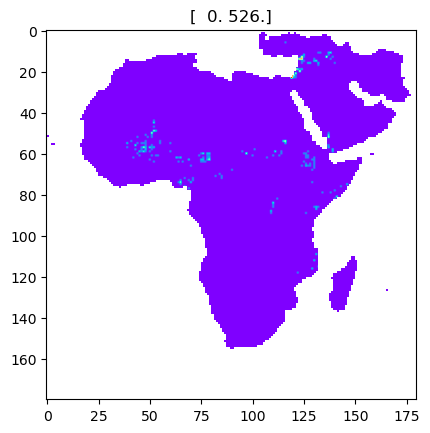

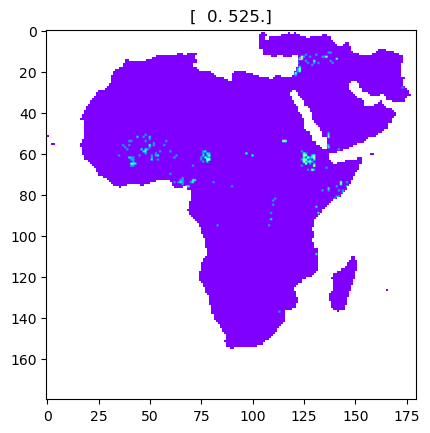

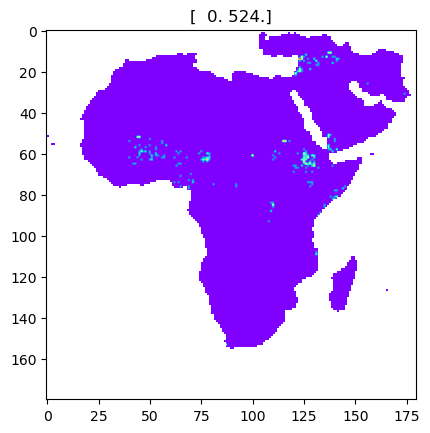

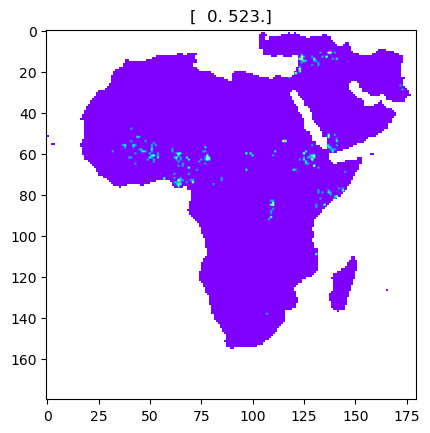

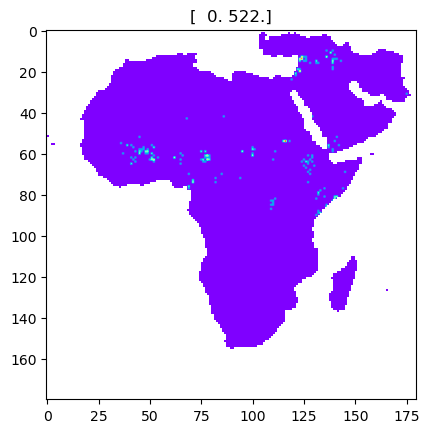

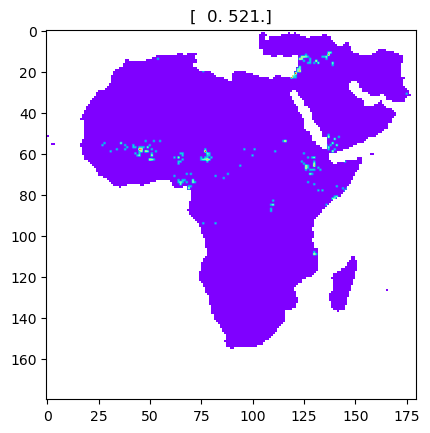

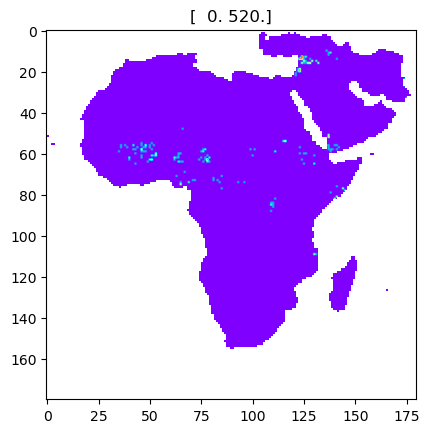

In [24]:
for i in range(10): #(vol.shape[0]):
    true_obs_masked = np.ma.masked_where((views_vol[0,:,:,4] == 0), views_vol[-(i+1),:,:,5])
    plt.imshow(true_obs_masked, cmap = 'rainbow')
    plt.title(np.unique(views_vol[-(i+1),:,:,3])) # mean wrong since lots of zeros (oceans etc.) Parhaps the zeros should just get a month_id anyway?
    plt.show()